In [48]:
# import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree

In [35]:
train_values = pd.read_csv( 'train_values.csv', index_col='building_id')
train_labels = pd.read_csv( 'train_labels.csv', index_col='building_id')
cleaned_train_labels = pd.read_csv( 'cleaned_train.csv')

In [54]:
cols = cleaned_train_labels.columns.tolist()
cols =  cols[:] + cols[1:2] 
cols.remove("damage_grade")
cleaned_train_labels = cleaned_train_labels[cols] 
#  pd.get_dummies(dataset, columns = [
one_hot = pd.get_dummies(cleaned_train_labels)
one_hot

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,6,487,12198,2,30,6,5,True,True,...,0,0,0,0,0,0,0,0,1,0
1,28830,8,900,2812,2,10,8,7,False,True,...,0,0,0,0,0,0,0,0,1,0
2,94947,21,363,8973,2,10,5,5,False,True,...,0,0,0,0,0,0,0,0,1,0
3,590882,22,418,10694,2,10,6,5,False,True,...,0,0,0,0,0,0,0,0,1,0
4,201944,11,131,1488,3,30,8,9,True,False,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,False,True,...,0,0,0,1,0,0,0,0,1,0
260597,669485,17,715,2060,2,0,6,5,False,True,...,0,0,0,0,0,0,0,0,1,0
260598,602512,17,51,8163,3,55,6,7,False,True,...,0,0,0,0,0,0,0,0,1,0
260599,151409,26,39,1851,2,10,14,6,False,False,...,0,0,0,0,0,0,0,0,1,0


In [16]:
ke = [0,1,2,3,4]
ke[1:2]

[1]

In [58]:
atributos, a_predecir = one_hot.iloc[:,:-1], cleaned_train_labels.iloc[:,-1]


In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(atributos, a_predecir, test_size=0.2, random_state=123)

In [60]:
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

In [61]:
preds = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds)) #calculo el error medio cuadratico
print("RMSE: %f" % (rmse))


RMSE: 0.155728


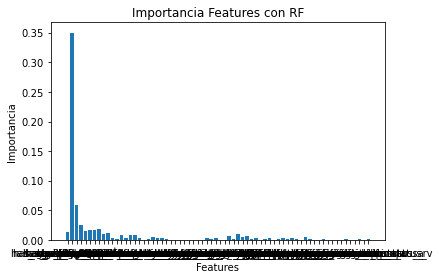

In [69]:
rf_model.feature_importances_.tolist()
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
# plt.xticks([0,1,10])
plt.show()